<a href="https://colab.research.google.com/github/MwangiMuriuki2003/MURIUKI/blob/main/Insights_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# CommBank Twitter Data - Interactive Exploration
# Run this section by section in your Jupyter notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

In [13]:
def convert_k_to_numeric(value):
    """Converts values with 'K' suffix to numeric."""
    if isinstance(value, str):
        value = value.strip()
        if value.upper().endswith('K'):
            try:
                return float(value[:-1]) * 1000
            except ValueError:
                return np.nan # Handle cases where conversion fails
    try:
        return float(value) # Handle values that are already numeric
    except ValueError:
        return np.nan # Handle any other conversion errors

df['Likes Count'] = df['Likes Count'].apply(convert_k_to_numeric)
df['Views Count'] = df['Views Count'].apply(convert_k_to_numeric)

print("Data types after conversion:")
print(df[['Likes Count', 'Views Count']].dtypes)
print("\nFirst few rows with converted values:")
display(df.head())

Data types after conversion:
Likes Count    float64
Views Count    float64
dtype: object

First few rows with converted values:


,Author Name,Post Date,Post Content,Image URL,Replies Count,Reposts Count,Likes Count,Views Count
0,CommBank,Mar 20,CommBank @CommBank · We’re excited to announce...,https://pbs.twimg.com/profile_images/169201917...,39.0,5,14.0,31000.0
1,CommBank,"Nov 3, 2021",CommBank @CommBank · We’re becoming the first ...,https://pbs.twimg.com/profile_images/169201917...,514.0,877,1800.0,NaN
2,CommBank,"Oct 19, 2024",CommBank @CommBank · We are aware some custome...,https://pbs.twimg.com/profile_images/169201917...,811.0,349,654.0,342000.0
3,CommBank,"Oct 17, 2016","CommBank @CommBank · From 2017, our support of...",https://pbs.twimg.com/profile_images/169201917...,37.0,174,582.0,NaN
4,CommBank,"Apr 3, 2022",CommBank @CommBank · We couldn’t be prouder of...,https://pbs.twimg.com/profile_images/169201917...,3.0,33,590.0,NaN


In [14]:
def clean_engagement_metric(value):
    """Convert engagement metrics like '1.8K', '342K' to numbers"""
    if pd.isna(value) or value == '':
        return 0
    if isinstance(value, (int, float)):
        return int(value)

    value = str(value).strip().upper()
    if value.endswith('K'):
        return int(float(value[:-1]) * 1000)
    elif value.endswith('M'):
        return int(float(value[:-1]) * 1000000)
    else:
        try:
            return int(value.replace(',', ''))
        except:
            return 0

# Apply cleaning to engagement columns
engagement_cols = ['Replies Count', 'Reposts Count', 'Likes Count', 'Views Count']
for col in engagement_cols:
    df[col] = df[col].apply(clean_engagement_metric)


In [15]:
def extract_tweet_text(content):
    """Extract clean tweet text from the post content"""
    if pd.isna(content):
        return ""
    # Remove the "CommBank @CommBank · " prefix
    text = str(content)
    if text.startswith("CommBank @CommBank · "):
        text = text[len("CommBank @CommBank · "):]
    return text.strip()

df['Clean_Tweet_Text'] = df['Post Content'].apply(extract_tweet_text)


In [16]:
# Convert post dates (handling the format we see)
def parse_post_date(date_str):
    """Parse various date formats in the dataset"""
    if pd.isna(date_str):
        return None

    date_str = str(date_str).strip()
    current_year = datetime.now().year

    try:
        # Handle "Mar 20" format (assume current year)
        if len(date_str.split()) == 2 and not any(char.isdigit() for char in date_str.split()[-1] if len(char) == 4):
            date_str += f", {current_year}"

        # Handle full dates like "Nov 3, 2021"
        if ',' in date_str:
            return pd.to_datetime(date_str)
        else:
            # For abbreviated dates, try to parse
            return pd.to_datetime(date_str + f", {current_year}")
    except:
        return None

df['Parsed_Date'] = df['Post Date'].apply(parse_post_date)

# Calculate engagement metrics
df['Total_Engagement'] = df['Replies Count'] + df['Reposts Count'] + df['Likes Count']
df['Engagement_Rate'] = df['Total_Engagement'] / (df['Views Count'] + 1)  # +1 to avoid division by zero

# Calculate text metrics
df['Tweet_Length'] = df['Clean_Tweet_Text'].str.len()
df['Word_Count'] = df['Clean_Tweet_Text'].str.split().str.len()

# 3. EXPLORATORY DATA ANALYSIS
print("\n3. Performing exploratory data analysis...")

print("\n" + "="*50)
print("ENGAGEMENT STATISTICS")
print("="*50)
print(f"Total replies: {df['Replies Count'].sum():,}")
print(f"Total reposts: {df['Reposts Count'].sum():,}")
print(f"Total likes: {df['Likes Count'].sum():,}")
print(f"Total views: {df['Views Count'].sum():,}")
print(f"Average engagement per post: {df['Total_Engagement'].mean():.1f}")


3. Performing exploratory data analysis...

ENGAGEMENT STATISTICS
Total replies: 1,944
Total reposts: 2,239
Total likes: 5,920
Total views: 463,000
Average engagement per post: 388.6



TOP 5 MOST ENGAGING POSTS:

1. Total Engagement: 3,191
   Likes: 1,800 | Reposts: 877 | Views: 0
   Text: We’re becoming the first Australian bank to offer the ability to buy, sell and hold crypto assets directly in the CommBank app....

2. Total Engagement: 1,814
   Likes: 654 | Reposts: 349 | Views: 342,000
   Text: We are aware some customers are seeing duplicate transactions from payments. We are working to reverse these transactions as a matter of urgency and a...

3. Total Engagement: 906
   Likes: 482 | Reposts: 227 | Views: 0
   Text: Apple Pay is coming for CommBank personal customers January 2019...

4. Total Engagement: 793
   Likes: 582 | Reposts: 174 | Views: 0
   Text: From 2017, our support of will focus on women’s cricket, Indigenous players, players with disabilities & local clubs...

5. Total Engagement: 626
   Likes: 590 | Reposts: 33 | Views: 0
   Text: We couldn’t be prouder of our champions. Congratulations to the team. Game changers live here...

4. Creating vis

Text(0, 0.5, 'Number of Posts')

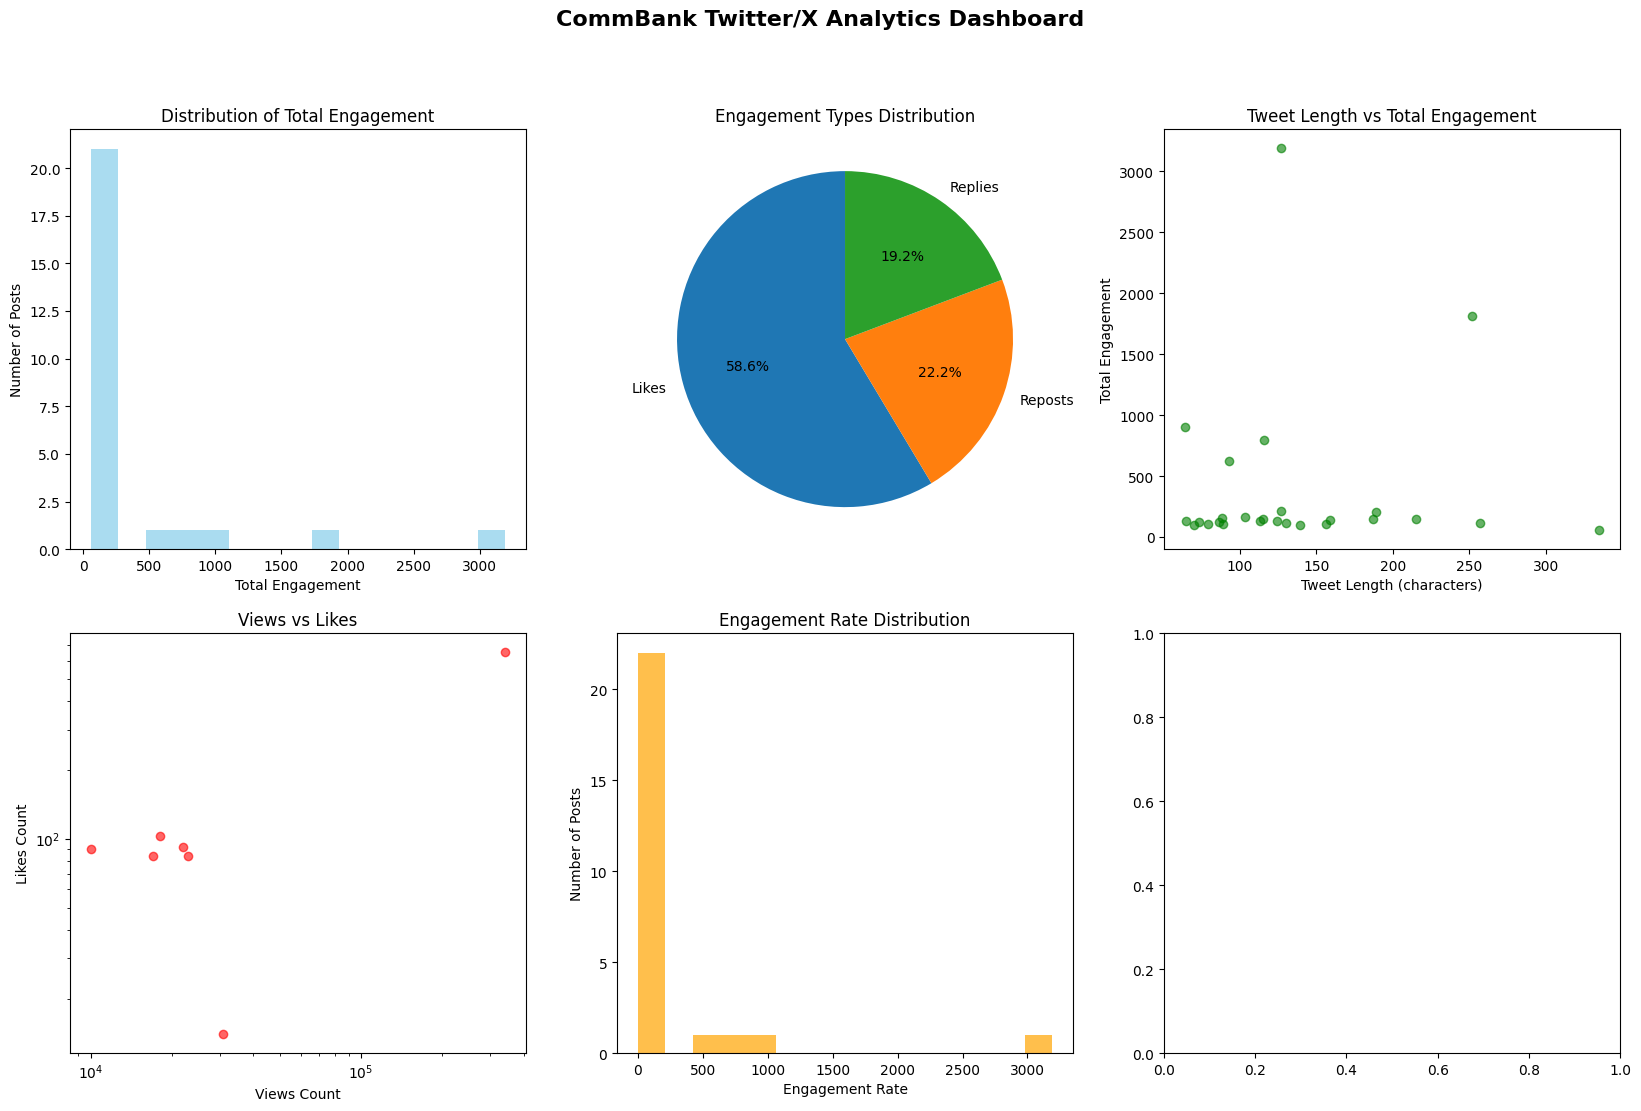

In [17]:
print(f"\nTOP 5 MOST ENGAGING POSTS:")
top_posts = df.nlargest(5, 'Total_Engagement')[['Clean_Tweet_Text', 'Total_Engagement', 'Likes Count', 'Reposts Count', 'Views Count']]
for idx, (index, post) in enumerate(top_posts.iterrows(), 1):
    print(f"\n{idx}. Total Engagement: {post['Total_Engagement']:,}")
    print(f"   Likes: {post['Likes Count']:,} | Reposts: {post['Reposts Count']:,} | Views: {post['Views Count']:,}")
    print(f"   Text: {post['Clean_Tweet_Text'][:150]}...")

# 4. VISUALIZATIONS
print("\n4. Creating visualizations...")

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('CommBank Twitter/X Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Engagement Distribution
axes[0, 0].hist(df['Total_Engagement'], bins=15, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Total Engagement')
axes[0, 0].set_xlabel('Total Engagement')
axes[0, 0].set_ylabel('Number of Posts')

# 2. Engagement Types Comparison
engagement_data = {
    'Likes': df['Likes Count'].sum(),
    'Reposts': df['Reposts Count'].sum(),
    'Replies': df['Replies Count'].sum()
}
axes[0, 1].pie(engagement_data.values(), labels=engagement_data.keys(), autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Engagement Types Distribution')

# 3. Tweet Length vs Engagement
axes[0, 2].scatter(df['Tweet_Length'], df['Total_Engagement'], alpha=0.6, color='green')
axes[0, 2].set_title('Tweet Length vs Total Engagement')
axes[0, 2].set_xlabel('Tweet Length (characters)')
axes[0, 2].set_ylabel('Total Engagement')

# 4. Likes vs Views scatter plot
mask = df['Views Count'] > 0  # Only include posts with view data
if mask.sum() > 0:
    axes[1, 0].scatter(df[mask]['Views Count'], df[mask]['Likes Count'], alpha=0.6, color='red')
    axes[1, 0].set_title('Views vs Likes')
    axes[1, 0].set_xlabel('Views Count')
    axes[1, 0].set_ylabel('Likes Count')
    axes[1, 0].set_xscale('log')
    axes[1, 0].set_yscale('log')
else:
    axes[1, 0].text(0.5, 0.5, 'No view data available', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Views vs Likes (No Data)')

# 5. Engagement Rate Distribution
axes[1, 1].hist(df['Engagement_Rate'], bins=15, alpha=0.7, color='orange')
axes[1, 1].set_title('Engagement Rate Distribution')
axes[1, 1].set_xlabel('Engagement Rate')
axes[1, 1].set_ylabel('Number of Posts')

<Figure size 640x480 with 0 Axes>


5. Performing text analysis...


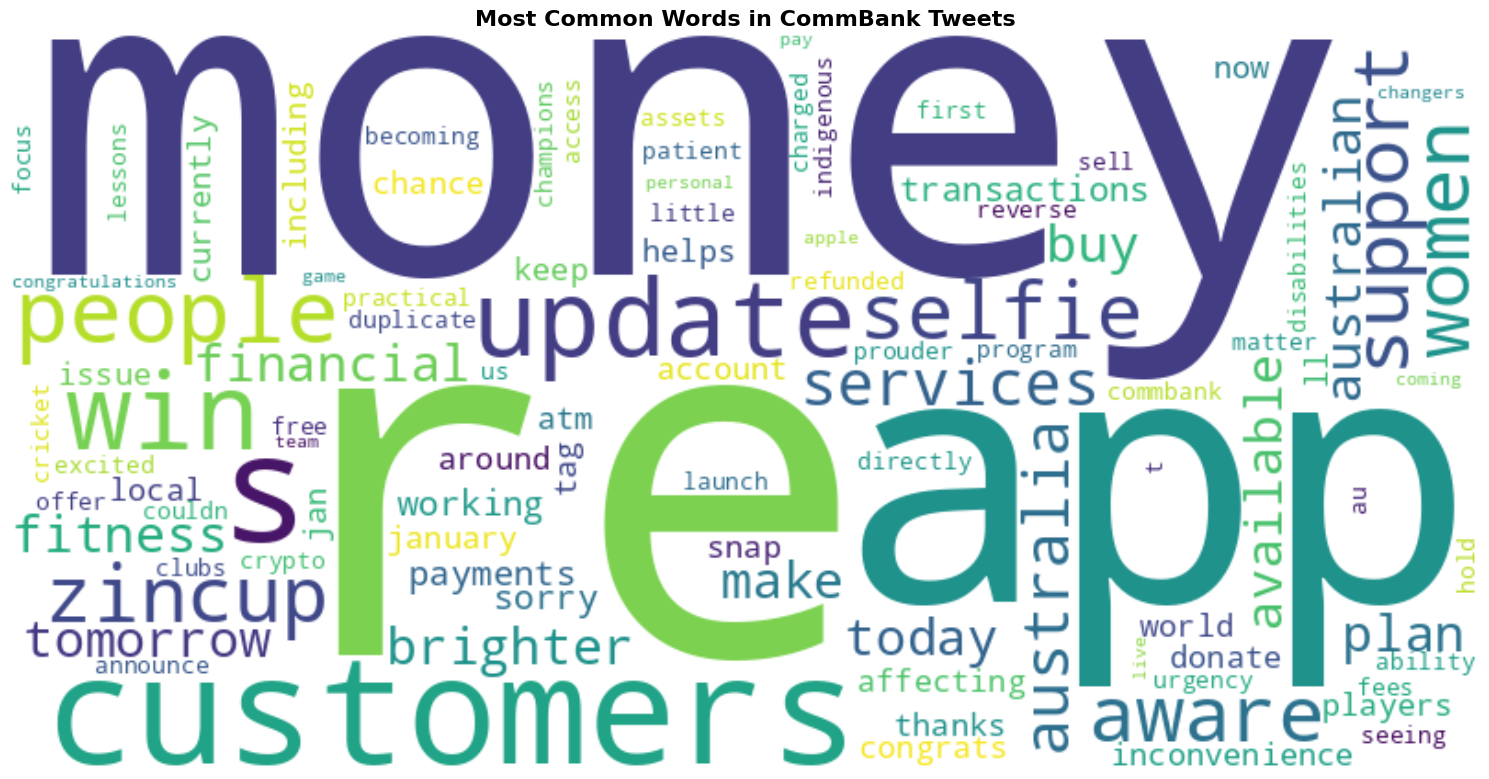

In [18]:
top_engagement = df.nlargest(10, 'Total_Engagement')
axes[1, 2].barh(range(len(top_engagement)), top_engagement['Total_Engagement'])
axes[1, 2].set_title('Top 10 Posts by Engagement')
axes[1, 2].set_xlabel('Total Engagement')
axes[1, 2].set_yticks(range(len(top_engagement)))
axes[1, 2].set_yticklabels([f"Post {i+1}" for i in range(len(top_engagement))])

plt.tight_layout()
plt.show()

# 5. TEXT ANALYSIS
print("\n5. Performing text analysis...")

# Word Cloud
all_text = ' '.join(df['Clean_Tweet_Text'].dropna())

# Clean text for word cloud
def clean_text_for_wordcloud(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove common banking/finance stopwords
    stopwords = ['commbank', 'com', 'au', 'bank', 'banking', 'will', 'can', 'one', 'get', 'new', 'us', 'help']
    words = text.lower().split()
    words = [word for word in words if word not in stopwords and len(word) > 2]
    return ' '.join(words)

clean_text = clean_text_for_wordcloud(all_text)

plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      colormap='viridis').generate(clean_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in CommBank Tweets', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [19]:
def extract_key_terms(text_series):
    """Extract key terms and their frequencies"""
    all_text = ' '.join(text_series.dropna()).lower()
    # Remove URLs and common words
    all_text = re.sub(r'http\S+|www\S+|https\S+', '', all_text)
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text)
    # Filter out common words
    common_words = {'the', 'and', 'for', 'are', 'with', 'this', 'that', 'from', 'they', 'have', 'will', 'can', 'our', 'you', 'your', 'all', 'any', 'may', 'commbank', 'bank'}
    words = [word for word in words if word not in common_words]
    return Counter(words).most_common(15)

key_terms = extract_key_terms(df['Clean_Tweet_Text'])

print("\n" + "="*50)
print("KEY TERMS IN COMMBANK TWEETS")
print("="*50)
for term, count in key_terms:
    print(f"{term.capitalize()}: {count}")

# 6. SENTIMENT ANALYSIS
print("\n6. Performing sentiment analysis...")


KEY TERMS IN COMMBANK TWEETS
Help: 4
Money: 4
App: 4
Customers: 4
Win: 4
Who: 4
People: 4
Further: 3
Aware: 3
Some: 3
Support: 3
Women: 3
Zincup: 3
Selfie: 3
Services: 3

6. Performing sentiment analysis...


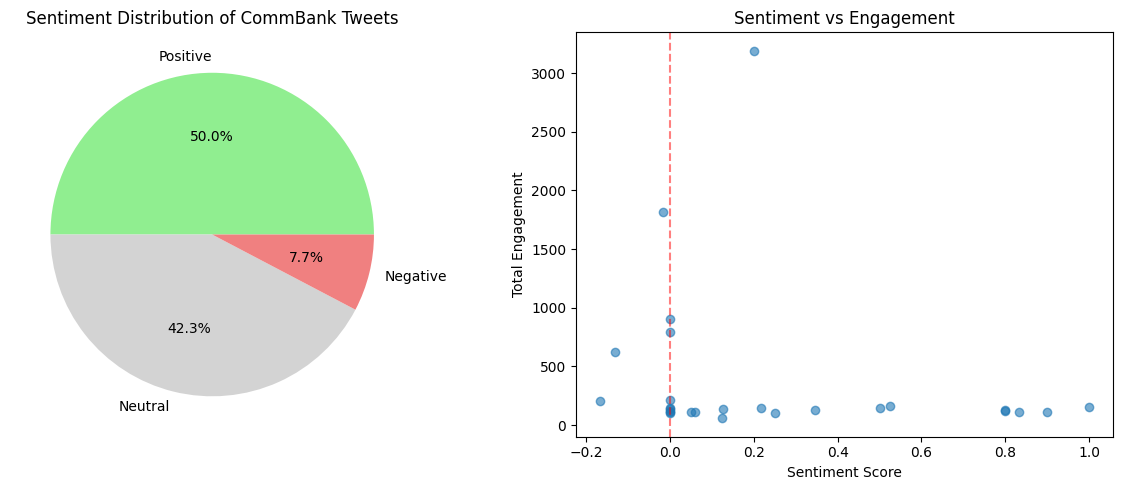


COMMBANK TWITTER INSIGHTS SUMMARY

📊 DATASET OVERVIEW:
   • Total posts analyzed: 26
   • Date range: Apr 3, 2022 to Sep 27, 2022

🎯 ENGAGEMENT PERFORMANCE:
   • Total engagement: 10,103
   • Average engagement per post: 388.6
   • Highest performing post: 3,191 total engagements
   • Most liked post: 1,800 likes
   • Most viewed post: 342,000 views

📝 CONTENT ANALYSIS:
   • Average tweet length: 136.6 characters
   • Average word count: 22.8 words
   • Most common topics: help, money, app, customers, win

😊 SENTIMENT ANALYSIS:
   • Positive: 50.0%
   • Neutral: 42.3%
   • Negative: 7.7%

🔍 KEY INSIGHTS:


In [20]:
def get_sentiment(text):
    """Calculate sentiment polarity"""
    if pd.isna(text) or text == '':
        return 0
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['Sentiment'] = df['Clean_Tweet_Text'].apply(get_sentiment)

def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

# Sentiment visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sentiment_counts = df['Sentiment_Category'].value_counts()
colors = ['lightgreen' if x=='Positive' else 'lightcoral' if x=='Negative' else 'lightgray' for x in sentiment_counts.index]
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution of CommBank Tweets')

plt.subplot(1, 2, 2)
plt.scatter(df['Sentiment'], df['Total_Engagement'], alpha=0.6)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Total Engagement')
plt.title('Sentiment vs Engagement')

plt.tight_layout()
plt.show()

# 7. INSIGHTS SUMMARY
print("\n" + "="*60)
print("COMMBANK TWITTER INSIGHTS SUMMARY")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total posts analyzed: {len(df):,}")
print(f"   • Date range: {df['Post Date'].min()} to {df['Post Date'].max()}")

print(f"\n🎯 ENGAGEMENT PERFORMANCE:")
print(f"   • Total engagement: {df['Total_Engagement'].sum():,}")
print(f"   • Average engagement per post: {df['Total_Engagement'].mean():.1f}")
print(f"   • Highest performing post: {df['Total_Engagement'].max():,} total engagements")
print(f"   • Most liked post: {df['Likes Count'].max():,} likes")
print(f"   • Most viewed post: {df['Views Count'].max():,} views")

print(f"\n📝 CONTENT ANALYSIS:")
print(f"   • Average tweet length: {df['Tweet_Length'].mean():.1f} characters")
print(f"   • Average word count: {df['Word_Count'].mean():.1f} words")
print(f"   • Most common topics: {', '.join([term for term, _ in key_terms[:5]])}")

print(f"\n😊 SENTIMENT ANALYSIS:")
for category in ['Positive', 'Neutral', 'Negative']:
    if category in sentiment_counts.index:
        percentage = (sentiment_counts[category] / len(df)) * 100
        print(f"   • {category}: {percentage:.1f}%")

print(f"\n🔍 KEY INSIGHTS:")

In [21]:
# Calculate correlation between sentiment and engagement
if len(df) > 1:
    sent_eng_corr = df['Sentiment'].corr(df['Total_Engagement'])
    print(f"   • Sentiment-Engagement correlation: {sent_eng_corr:.3f}")

# Find posts about specific topics
crypto_posts = df[df['Clean_Tweet_Text'].str.contains('crypto|bitcoin|digital', case=False, na=False)]
if len(crypto_posts) > 0:
    print(f"   • Posts about crypto/digital assets: {len(crypto_posts)}")
    print(f"   • Average engagement for crypto posts: {crypto_posts['Total_Engagement'].mean():.1f}")

customer_service_posts = df[df['Clean_Tweet_Text'].str.contains('sorry|apolog|issue|problem|fix|resolve', case=False, na=False)]
if len(customer_service_posts) > 0:
    print(f"   • Customer service related posts: {len(customer_service_posts)}")
    print(f"   • Average engagement for service posts: {customer_service_posts['Total_Engagement'].mean():.1f}")

# 8. SAVE RESULTS
print(f"\n8. Saving results...")

# Create enhanced dataset with all our calculated metrics
enhanced_df = df.copy()

# Save to Excel with multiple sheets
with pd.ExcelWriter('CommBank_Twitter_Analysis_Results.xlsx', engine='openpyxl') as writer:
    # Main dataset with new features
    enhanced_df.to_excel(writer, sheet_name='Enhanced_Data', index=False)

    # Top performing posts
    top_posts_detailed = df.nlargest(10, 'Total_Engagement')[
        ['Post Date', 'Clean_Tweet_Text', 'Likes Count', 'Reposts Count', 'Replies Count', 'Views Count', 'Total_Engagement', 'Sentiment_Category']
    ]
    top_posts_detailed.to_excel(writer, sheet_name='Top_Posts', index=False)

    # Key terms analysis
    key_terms_df = pd.DataFrame(key_terms, columns=['Term', 'Frequency'])
    key_terms_df.to_excel(writer, sheet_name='Key_Terms', index=False)

    # Sentiment summary
    sentiment_summary = df['Sentiment_Category'].value_counts().reset_index()
    sentiment_summary.columns = ['Sentiment', 'Count']
    sentiment_summary['Percentage'] = (sentiment_summary['Count'] / len(df)) * 100
    sentiment_summary.to_excel(writer, sheet_name='Sentiment_Summary', index=False)

print("✅ Analysis complete! Results saved to 'CommBank_Twitter_Analysis_Results.xlsx'")
print("\nFiles created:")
print("   • CommBank_Twitter_Analysis_Results.xlsx (Complete analysis)")
print("   • Visualizations displayed above")

print(f"\n🎉 CommBank Twitter analysis successfully completed!")

   • Sentiment-Engagement correlation: -0.192
   • Posts about crypto/digital assets: 1
   • Average engagement for crypto posts: 3191.0
   • Customer service related posts: 4
   • Average engagement for service posts: 591.8

8. Saving results...
✅ Analysis complete! Results saved to 'CommBank_Twitter_Analysis_Results.xlsx'

Files created:
   • CommBank_Twitter_Analysis_Results.xlsx (Complete analysis)
   • Visualizations displayed above

🎉 CommBank Twitter analysis successfully completed!
